In [1]:
using Lehmann

┌ Info: Precompiling Lehmann [95bf888a-8996-4655-9f35-1c0506bdfefe]
└ @ Base loading.jl:1342


In [2]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342


In [3]:
diff(a, b) = maximum(abs.(a - b)) # return the maximum deviation between a and b

conformal_tau(τ, β) = -π^(1 / 4) / sqrt(2β) * 1 / sqrt(sin(π * τ / β))

function syk_sigma_dlr(d, G_x, J = 1.0)

    tau_k = d.τ # DLR imaginary time nodes
    tau_k_rev = d.β .- tau_k # Reversed imaginary time nodes

    G_x_rev = tau2tau(d, G_x, tau_k_rev) # G at beta - tau_k

    Sigma_x = J .^ 2 .* G_x .^ 2 .* G_x_rev # SYK self-energy in imaginary time

    # println("sigma diff: ", diff(Sigma_k, dlr2tau(d, Sigma_x)))
    # for i in 1:length(Sigma_x)
    #     println("$(d.τ[i])    $(real(Sigma_x[i]))     $(imag(Sigma_x[i]))")
    # end
    # exit(0)
    # return real.(Sigma_k)
    return Sigma_x
end

syk_sigma_dlr (generic function with 2 methods)

In [4]:
function solve_syk_with_fixpoint_iter(d, mu, tol = d.rtol; mix = 0.3, maxiter = 50, G_x = zeros(ComplexF64, length(d)))

    for iter in 1:maxiter

        # println("G diff: ", diff(G_q, dlr2matfreq(d, G_x)))
        Sigma_x = syk_sigma_dlr(d, G_x)

        # for i in 1:d.size
        #     println("$(d.τ[i])    $(real(Sigma_x_new[i]))     $(imag(Sigma_x_new[i]))")
        # end
        # println(typeof(Sigma_x_new))

        G_q_new = -1 ./ (d.ωn * 1im .- mu .- tau2matfreq(d, Sigma_x)) # Solve Dyson

        G_x_new = matfreq2tau(d, G_q_new)

        println("imag", maximum(abs.(imag.(G_x_new))))

        println(diff(G_x_new, G_x))
        if maximum(abs.(G_x_new .- G_x)) < tol && iter > 5
            break
        end

        G_x = mix * G_x_new + (1 - mix) * G_x # Linear mixing
    end
    return G_x
end

solve_syk_with_fixpoint_iter (generic function with 2 methods)

In [28]:
d = DLRGrid(Euv = 5.0, β = 1000.0, isFermi = true, rtol = 1e-14)

rank = 95 ferminoic DLR with none symmetry: Euv = 5.0, β = 1000.0, rtol = 1.0e-14
# index                          freq                           tau                            ωn                         n
    1                -9.994647308096507            0.00026136190935016125               -54.390393611600089             -8657
    2               -9.7421818538317204              0.020572557091974485               -36.037209329328512             -5736
    3               -9.1483645377501723              0.068079993869750846               -26.700395962859652             -4250
    4                -8.605721725547502               0.14588504907423441               -17.030573775110266             -2711
    5               -7.6635078230753582               0.22356806790802555               -12.035441455902497             -1916
    6               -7.0122741949596783               0.34239620092576561               -9.5787160007952785             -1525
    7                -6.11107441745099

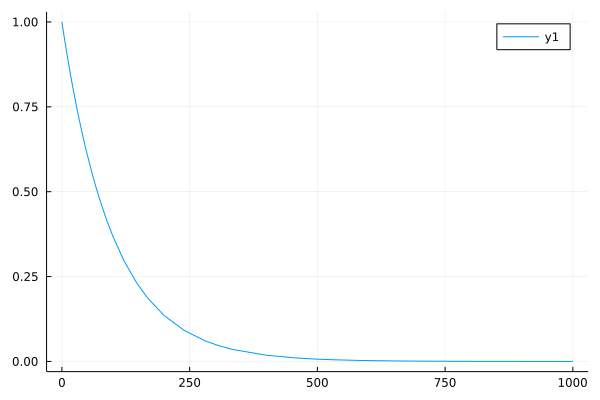

In [36]:
mu=0.01
G_q_new = -1 ./ (d.ωn * 1im .-mu)
G_x_new = matfreq2tau(d, G_q_new)
plot(d.τ, real.(G_x_new))

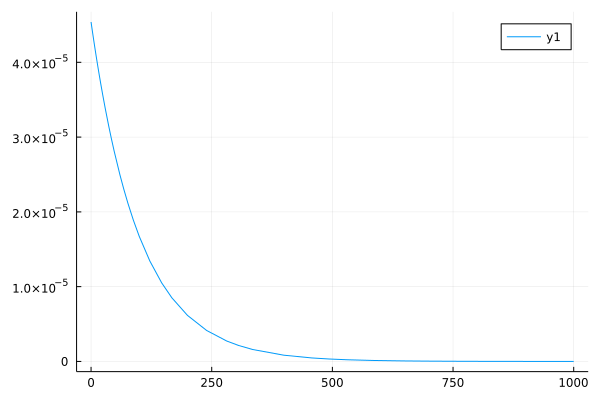

In [37]:

G_q_new = -1 ./ (d.ωn * 1im .-mu)
G_x_new = matfreq2tau(d, G_q_new)
Sigma_x = syk_sigma_dlr(d, G_x_new)
Sigma_n = tau2matfreq(d, Sigma_x)
#plot(d.n, real.(Sigma_n))
plot(d.τ, real.(Sigma_x))

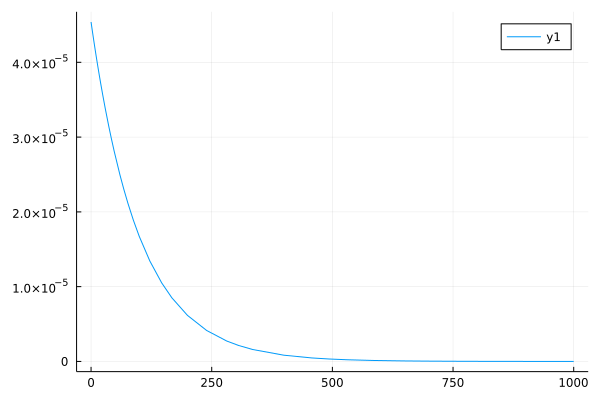

In [38]:
Sigma_t = matfreq2tau(d, Sigma_n)
plot(d.τ, real.(Sigma_t))

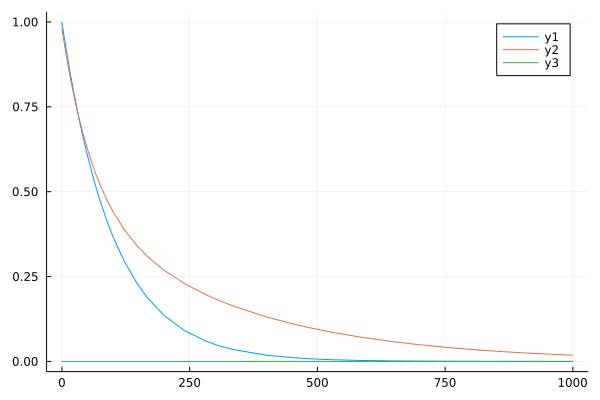

In [41]:
G_q_exact = -1 ./ (d.ωn * 1im .-mu )
G_q_new = -1 ./ (d.ωn * 1im .-mu .+ tau2matfreq(d, Sigma_x) )
p = plot(d.τ, real.(matfreq2tau(d, G_q_exact)))
plot!(d.τ, real.(matfreq2tau(d, G_q_new)))
plot!(d.τ, imag.(matfreq2tau(d, G_q_new)))